In [2]:
import os
from torchvision import transforms

In [3]:
from segmentation.data_loader.segmentation_dataset import SegmentationDataset
from segmentation.data_loader.transform import Rescale, ToTensor
from segmentation.trainer import Trainer
from segmentation.predict import *
from segmentation.models import all_models
from util.logger import Logger

import matplotlib.pyplot as plt

In [3]:
!pip install tensorboardX

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 3.4 MB/s eta 0:00:00


In [4]:
model_name = "pspnet_resnet34"
device = 'cuda'
batch_size = 4
n_classes = 34 
check_point_stride = 1 # store checkpoints every 1 epoch   
image_axis_minimum_size = 200

num_epochs = 1    # 1 for 1st training
                  # n for retraining
                  # 0 for detect-only
pretrained = True# True  for num_epochs=1 without logger.load_model below
                  # False for num_epochs=n with    logger.load_model below
                  # False for detect-only  with    logger.load_model below
fixed_feature = False

logger = Logger(model_name=model_name, data_name='example')

In [5]:
train_images = 'ACGPN_TrainData/train_img'
train_labled = 'ACGPN_TrainData/train_label'
test_images  = 'ACGPN_TestData/test_img'
test_labeled = 'ACGPN_TestData/test_label'

In [6]:
compose = transforms.Compose([Rescale(image_axis_minimum_size), ToTensor()])

In [7]:
train_datasets = SegmentationDataset(train_images, train_labled, n_classes, compose)

100%|███████████████████████████████████| 14221/14221 [00:11<00:00, 1248.44it/s]

Dataset verified! 


In [8]:
train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=batch_size, shuffle=True, drop_last=True)

In [11]:
test_datasets = SegmentationDataset(test_images, test_labeled, n_classes, compose)

100%|█████████████████████████████████████| 2032/2032 [00:01<00:00, 1264.24it/s]

Dataset verified! 


In [12]:
test_loader = torch.utils.data.DataLoader(test_datasets, batch_size=batch_size, shuffle=True, drop_last=True)

In [13]:
model = all_models.model_from_name[model_name](n_classes, batch_size, pretrained=pretrained, fixed_feature=fixed_feature)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/chrisdemta/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:03<00:00, 26.1MB/s]


In [16]:
model.to('cpu')

PSPnet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [17]:
if pretrained and fixed_feature: #fine-tuning here
    params_to_update = model.parameters()
    print("To learn")
    params_to_update = []
    for name, param in model.names_parameters():
        if param.require_grad == True:
            params_to_update.append(param)
            print("\t", name)
            optimizer = torch.optim.Adadelta(params_to_update)
else:
    optimizer = torch.optim.Adadelta(model.parameters())

In [19]:
trainer = Trainer(model, optimizer, logger, num_epochs, train_loader, test_loader, check_point_epoch_stride=check_point_stride)


In [20]:
trainer.train()

Train: 100%|██████████████████████████████████| 1/1 [2:13:05<00:00, 7985.62s/it]


In [21]:
os.mkdir('output')
out_path = './output'

In [22]:
testfiles = os.listdir(test_images)

In [23]:
testfiles

['016309_0.jpg',
 '019531_0.jpg',
 '008062_0.jpg',
 '001467_0.jpg',
 '008326_0.jpg',
 '005594_0.jpg',
 '002455_0.jpg',
 '005145_0.jpg',
 '010270_0.jpg',
 '006276_0.jpg',
 '013106_0.jpg',
 '014416_0.jpg',
 '011270_0.jpg',
 '003882_0.jpg',
 '007446_0.jpg',
 '000915_0.jpg',
 '007891_0.jpg',
 '012773_0.jpg',
 '009984_0.jpg',
 '011328_0.jpg',
 '019045_0.jpg',
 '019494_0.jpg',
 '005489_0.jpg',
 '002962_0.jpg',
 '007702_0.jpg',
 '004431_0.jpg',
 '013437_0.jpg',
 '003649_0.jpg',
 '018411_0.jpg',
 '005449_0.jpg',
 '012898_0.jpg',
 '019411_0.jpg',
 '014959_0.jpg',
 '019454_0.jpg',
 '006486_0.jpg',
 '016541_0.jpg',
 '013327_0.jpg',
 '006057_0.jpg',
 '001547_0.jpg',
 '001502_0.jpg',
 '015637_0.jpg',
 '018710_0.jpg',
 '008206_0.jpg',
 '018755_0.jpg',
 '019384_0.jpg',
 '001928_0.jpg',
 '019078_0.jpg',
 '011781_0.jpg',
 '006313_0.jpg',
 '007313_0.jpg',
 '002575_0.jpg',
 '012063_0.jpg',
 '006523_0.jpg',
 '011560_0.jpg',
 '012282_0.jpg',
 '002345_0.jpg',
 '012616_0.jpg',
 '017070_0.jpg',
 '004185_0.jpg

In [25]:
for testfile in testfiles:
    outfile = testfile[:-4] + '.png'
    predict(model, test_images+'/'+testfile, out_path+'/'+outfile)

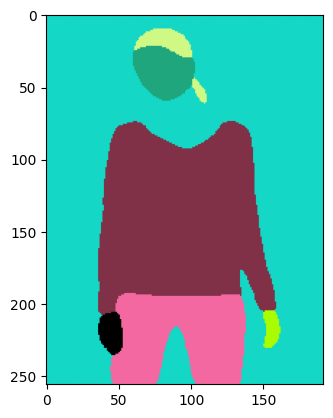

In [30]:
img = plt.imread('output/000066_0.png')
plt.imshow(img)
plt.show()